# Contents:
- compute compound interest, present and future value
- understand amortization, interest and principal in mortgage
- understand cumulative payments and home
- analyze different possible economic scenarios

# Tools:
- npv, irr and wacc
- eaa for different life spans
- annually monthly mortgage rate and monthly mortgage payment
- cumulative interest paid and equity accumulated
- cumulative growth or decline over time

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

plt.style.use('seaborn')
plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

# The Time Value of Money

## Compound Interest
- calculate the value of a $100 investment which grows at a rate of 6% per year for 30 years in a row compounded once per year 

In [2]:
# Predefined variables
initial_investment = 100
growth_periods = 30
growth_rate = 0.06

# Calculate the value for the investment compounded once per year
compound_periods = 1
investment = initial_investment*(1 + growth_rate / compound_periods)**(compound_periods*growth_periods)
print("Investment: " + str(round(investment, 2)))

Investment: 574.35


## Present and Future Value

### Future value
- calculate the future value of a $10,000 investment returning 5% per year for 15 years

In [3]:
investment_1 = np.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 15 years")

Investment 1 will yield a total of $20789.28 in 15 years


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  """Entry point for launching an IPython kernel.


### Present value
- compute the present value of an investment which will yield $10,000 15 years from now at an inflation rate of 3% per year

In [4]:
# Calculate investment_1
investment_2 = np.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Note that the present value returned is negative, so we multiply the result by -1
print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's dollars")

Investment 2 is worth 6418.62 in today's dollars


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  


### Net Present Value and Cash Flow

In [5]:
# Create an array of cash flows for project 1
cash_flows_1 = np.array([-250, 100, 200, 300, 400])

# Create an array of cash flows for project 2
cash_flows_2 = np.array([-250, 300, -250, 300, 300])

# Calculate the net present value of project 1
investment_1 = np.npv(rate=0.03, values=cash_flows_1)
print("The net present value of Investment 1 is worth $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate the net present value of project 2
investment_2 = np.npv(rate=0.03, values=cash_flows_2)
print("The net present value of Investment 2 is worth $" + str(round(investment_2, 2)) + " in today's dollars")

The net present value of Investment 1 is worth $665.54 in today's dollars
The net present value of Investment 2 is worth $346.7 in today's dollars


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  if sys.path[0] == '':


### IRR

In [7]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-1000, 200, 250, 300, 350, 400, 450, 500, 550, 600])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-1000, 150, 225, 300, 375, 425, 500, 575, 600, 625])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

# Calculate the internal rate of return for Project 1
irr_project1 = np.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the internal rate of return for Project 2
irr_project2 = np.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 28.92%
Project 2 IRR: 28.78%


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  if sys.path[0] == '':
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  app.launch_new_instance()


# Making Data-Driven Financial Decisions

## wacc

**$WACC = F_E ∗ C_E + F_D ∗ C_D ∗ (1 − TR)$**:
- $F_E$ : The proportion (%) of a company's financing via equity
- $F_D$ : The proportion (%) of a company's financing via debt
- $C_E$ : The cost of a company's equity
- $C_D$ : The cost of a company's debt
- $TR$ : The corporate tax rate

The proportion (%) of financing can be calculated as follows:
- $F_D = M_D / M_T$
- $F_E = M_E / M_T$
- $M_T = M_E + M_D$
- $M_E$ : Market value of a company's debt
- $M_D$ : Market value of a company's equity
- $M_T$ : Total value of a company's financing

In [8]:
# Set the market value of debt
mval_debt = 1000000

# Set the market value of equity
mval_equity = 1000000

# Compute the total market value of your company's financing
mval_total = mval_debt + mval_equity

# Compute the proportion of your company's financing via debt
percent_debt = mval_debt / mval_total
print("Debt Financing: " + str(round(100*percent_debt, 2)) + "%")

# Compute the proportion of your company's financing via equity
percent_equity = mval_equity / mval_total
print("Equity Financing: " + str(round(100*percent_equity, 2)) + "%")

Debt Financing: 50.0%
Equity Financing: 50.0%


In [9]:
# The proportion of debt vs equity financing is predefined
percent_debt = 0.50
percent_equity = 0.50

# Set the cost of equity
cost_equity = 0.18

# Set the cost of debt
cost_debt = 0.12

# Set the corporate tax rate
tax_rate = 0.35

# Calculate the WACC
wacc = (percent_equity*cost_equity) + (percent_debt*cost_debt) * (1 - tax_rate)
print("WACC: " + str(round(100*wacc, 2)) + "%")

WACC: 12.9%


In [10]:
# Set your weighted average cost of capital equal to 12.9%
wacc = 0.129

# Calculate the net present value for Project 1
npv_project1 = np.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the net present value for Project 2
npv_project2 = np.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 NPV: 856073.18
Project 2 NPV: 904741.35


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  """
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  if __name__ == '__main__':


## Comparing Two Projects with Different Life Spans
- **Equivalent Annual Annuity (EAA)**: compare two projects by essentially assuming that each project is an investment generating a flat interest rate each year (an annuity), and calculating the annual payment you would receive from each project, discounted to present value

In [11]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-700, 100, 150, 200, 250, 300, 350, 400])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-400, 50, 100, 150, 200, 250, 300])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000 

In [12]:
# Calculate the IRR for Project 1
irr_project1 = np.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the IRR for Project 2
irr_project2 = np.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

# Set the wacc equal to 12.9%
wacc = 0.129

# Calculate the NPV for Project 1
npv_project1 = np.npv(rate=wacc, values=cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the NPV for Project 2
npv_project2 = np.npv(rate=wacc, values=cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%
Project 1 NPV: 302744.98
Project 2 NPV: 231228.39


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  del sys.path[0]
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).


In [13]:
# Calculate the EAA for Project 1
eaa_project1 = np.pmt(rate=wacc, nper=8, pv=-npv_project1, fv=0)
print("Project 1 EAA: " + str(round(eaa_project1, 2)))

# Calculate the EAA for Project 2
eaa_project2 = np.pmt(rate=wacc, nper=7, pv=-npv_project2, fv=0)
print("Project 2 EAA: " + str(round(eaa_project2, 2)))

Project 1 EAA: 62872.2
Project 2 EAA: 52120.61


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  
C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  


# Simulating a Mortgage Loan

## Mortgage Basics

In [14]:
# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.2

# Calculate the dollar value of the down payment
down_payment = home_value*down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value-down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


In [15]:
# You have been given a 30-year mortgage loan quote for your desired amount at 3.75%
mortgage_rate = 0.0375

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1+mortgage_rate)**(1/12) - 1

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 30*12

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


C:\Users\Thinkpad\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  # This is added back by InteractiveShellApp.init_path()


## Amortization, Interest and Principal

- Principal (Equity): the amount of your mortgage paid that counts towards the value of the house itself
- Interest Payment: $IP_P = RMB ∗ R_P$
- Principal Payment: $PP_P = MP_P − IP_P$
- PP: Principal Payment
- MP: Mortgage Payment
- IP: Interest Payment
- R: Mortgage Interest Rate (Periodic)
- Periodic Periodic RMB: Remaining Mortgage Balance

### Calculating interest and principal payments

In [16]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan*mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


### Simulating Periodic Payments

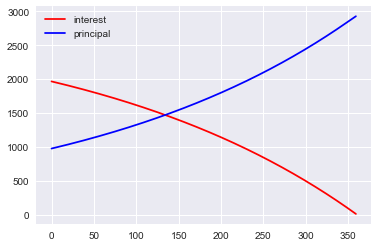

In [17]:
interest_paid = np.zeros(mortgage_payment_periods)
principal_paid = np.zeros(mortgage_payment_periods)
principal_remaining = np.zeros(mortgage_payment_periods)
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
# Plot the interest vs principal
interest_plot, = plt.plot(interest_paid, color="red",  label='interest')
principal_plot, = plt.plot(principal_paid, color="blue", label='principal')
plt.legend(handles=[interest_plot, principal_plot])
plt.show()

## Home Ownership, Equity and Forecasting
**Percentage of the Home You Actually Own (Home Equity)**:
- $Percent Equity Owned_t = P_{Down} + E_{Cumulative, t} / V_{Home}$
- $E_{Cumulative, t} = \sum_{t=1}^{T}{P_{Principal, t}}$
- $E_{Cumulative, t}$: Cumulative home equity at time t
- $P_{Principal, t}$ : Principal payment at time t
- $V_{Home}$ : Total home value
- $P_{Down}$ : Initial down payment

### Cumulative payments and home equity

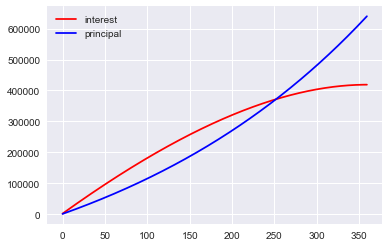

In [18]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over timea
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
 
# Plot the cumulative interest paid vs equity accumulated
interest_plot, = plt.plot(cumulative_interest_paid, color='red', label='interest')
principal_plot, = plt.plot(cumulative_home_equity, color='blue', label='principal')
plt.legend(handles=[interest_plot, principal_plot])
plt.show()

### Rising housing prices

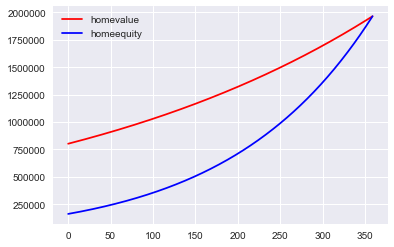

In [19]:
# Home equity value over time given a steady growth rate of 0.25% per month
growth_array = np.repeat(0.0025, mortgage_payment_periods)
# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1+growth_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned*home_value_forecast

# Plot the home value vs equity accumulated
homevalue_plot, = plt.plot(home_value_forecast, color='red', label='homevalue')
homeequity_plot, = plt.plot(cumulative_home_value_owned, color='blue', label='homeequity')
plt.legend(handles=[homevalue_plot, homeequity_plot], loc=2)
plt.show()

### Falling housing prices and underwater mortgages
- **Underwater Mortgage**: when the remaining amount you owe on your mortgage is actually higher than the value of the house itself

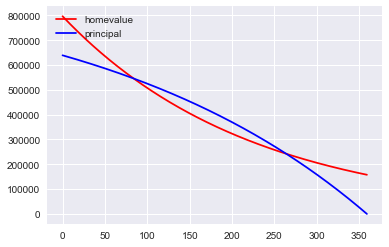

In [20]:
# Home prices drop steadily at the rate of 0.45% per month
decline_array = np.repeat(0.0045, mortgage_payment_periods)

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1-decline_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast
pd.value_counts(underwater)

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(handles=[homevalue_plot, principal_plot], loc=2)
plt.show()